In [35]:
!pip install xgboost

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [37]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [38]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [40]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [41]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [42]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [43]:
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [44]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [45]:
df.duplicated().sum()

1171

In [46]:
df.drop_duplicates(inplace=True)

<ipython-input-47-bd28006d40c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,square = True,cmap='Blues')


<AxesSubplot:>

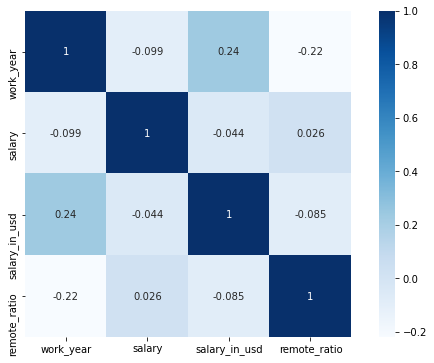

In [47]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,square = True,cmap='Blues')

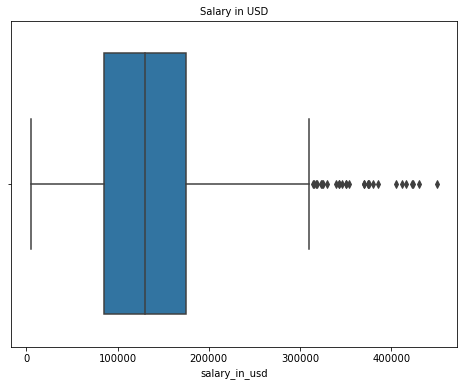

In [48]:
plt.figure(figsize = (8,6))
sns.boxplot(x = df['salary_in_usd'])
plt.title('Salary in USD', fontsize = 10)
plt.show()

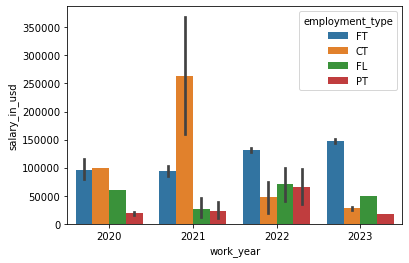

In [49]:
sns.barplot(x ='work_year',y = 'salary_in_usd',data = df,hue = 'employment_type')
plt.show()

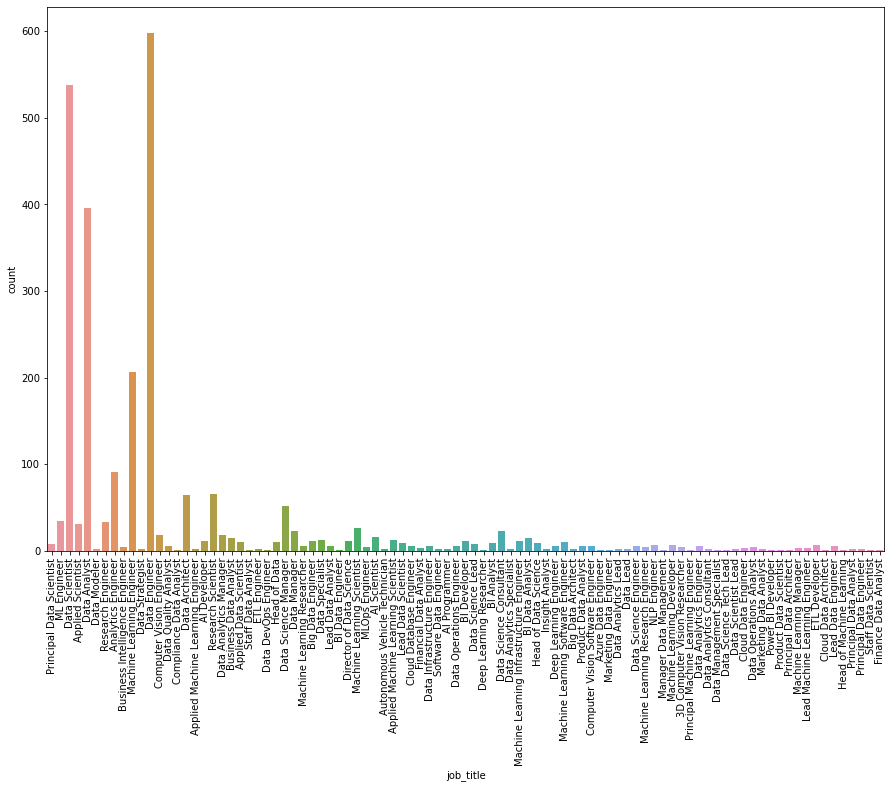

In [50]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'job_title',data = df)
plt.xticks(rotation=90)
plt.show()

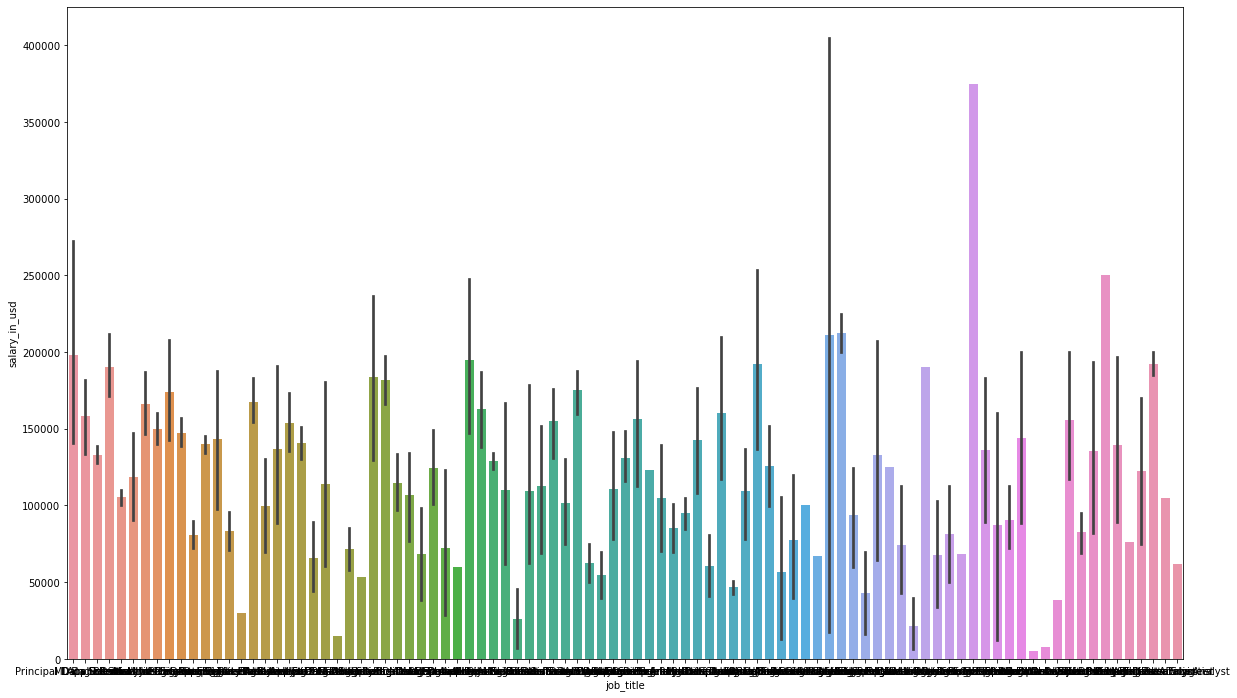

In [51]:
plt.figure(figsize = (20,12))
sns.barplot(x = 'job_title',y='salary_in_usd',data=df)
plt.show()

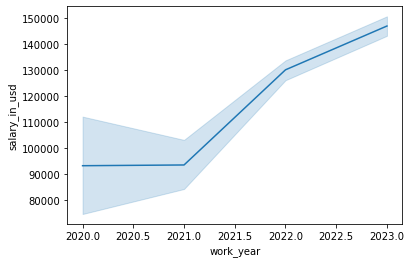

In [52]:
sns.lineplot(x = 'work_year',y='salary_in_usd',data=df)
plt.show()

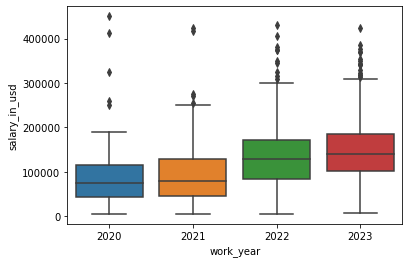

In [53]:
sns.boxplot(x='work_year',y='salary_in_usd',data=df)
plt.show()

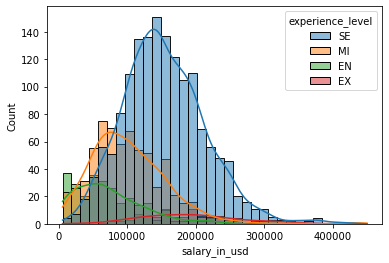

In [54]:
sns.histplot(data=df,x= 'salary_in_usd',kde=True,hue='experience_level')
plt.show()

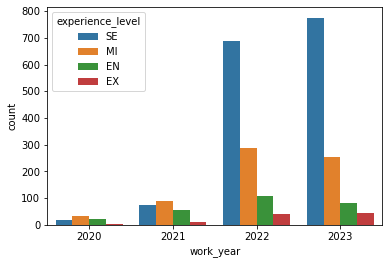

In [55]:
sns.countplot(x='work_year',data=df,hue='experience_level')
plt.show()

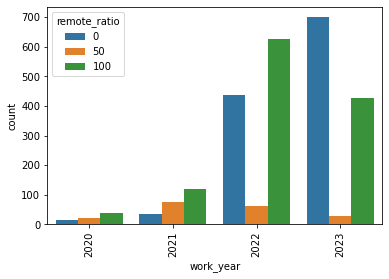

In [56]:
sns.countplot(x='work_year',data=df,hue='remote_ratio')
plt.xticks(rotation=90)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


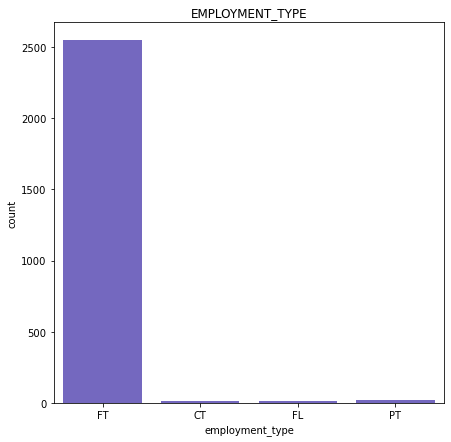

In [57]:
plt.figure(figsize=(7,7))
sns.countplot(df['employment_type'],data=df,color='slateblue')
plt.title('EMPLOYMENT_TYPE')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


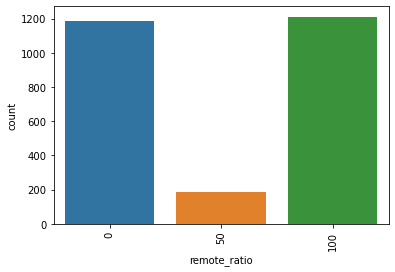

In [58]:
sns.countplot(df['remote_ratio'],data=df)
plt.xticks(rotation=90)
plt.show()

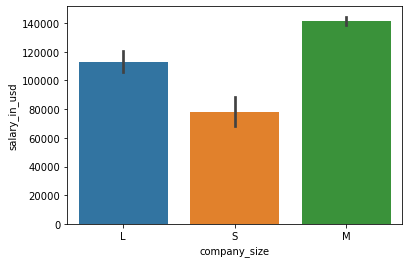

In [59]:
sns.barplot(x='company_size',y='salary_in_usd',data=df)
plt.show()

Data Preprocessing

In [60]:
df[df['employee_residence']==df['company_location']]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [61]:
X = df.drop('salary_in_usd',axis=1)
y = df['salary_in_usd']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_cols=list(X.select_dtypes(include=numerics).columns)
num_cols

['work_year', 'salary', 'remote_ratio']

In [28]:
#print(type('work_year'))

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [68]:
pipeline = ColumnTransformer(
[
   ('scaler',StandardScaler(),num_cols)
])

In [69]:
X_train = pipeline.fit_transform(X_train)

In [70]:
X_test = pipeline.transform(X_test)

Model Evaluation

In [82]:
rf = RandomForestRegressor(n_estimators = 100,max_depth = 25,random_state=42)
rf.fit(X_train,y_train)
#make predictions on test data
y_pred = rf.predict(X_test)

In [83]:
#calculating accuracy of the model
#mse = mean_squared_error(y_test,y_pred)
print('RandomForestRegressor :')
print('MSE : ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE : ',mean_squared_error(y_test,y_pred,squared=False))

RandomForestRegressor :
MSE :  950037577.8564425
MAE:  6272.537808179767
RMSE :  30822.6796021443


In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [85]:
print('LinearRegression')
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))

LinearRegression
MSE:  4093985100.903081
MAE:  51780.608300357475
RMSE:  63984.25666445677


In [87]:
xgb = XGBRegressor(n_estimators=100,learning_rate = 0.1,random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [88]:
print('XGBRegressor :')
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))

XGBRegressor :
MSE:  1054664370.1161976
MAE:  6775.579758900508
RMSE:  32475.59653210696


In [89]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
print('LogisticRegression: ')
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))

LogisticRegression: 
MSE:  3972462664.7272725
MAE:  48510.506769825915
RMSE:  63027.47547480601


In [94]:
dt = DecisionTreeRegressor(max_depth = 25,random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [95]:
print('DecisionTreeRegressor: ')
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))

DecisionTreeRegressor: 
MSE:  1131098735.120813
MAE:  6654.020404022343
RMSE:  33631.81135652394


In [96]:
!pip install tensorflow

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

In [97]:
!pip install keras


  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518835 sha256=91d202c7cd66a88b5c2a8a3d819f558781c287bd2fa7e610a3406ee6a8b54734
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\d9\15\d2800d4089dc4c77299ac7513c6aa1036f5491edbd2bf6ba16
Successfully built jax
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.0
    Uninstalling protobuf-4.21.0:
      Successfully uninstalled protobuf-4.21.0


In [101]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [99]:
#create model
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [102]:
#model compile
model.compile(loss = tf.keras.losses.MeanSquaredError(),optimizer='adam')

In [103]:
#fit the model
history = model.fit(X_train,y_train,epochs =250)

Epoch 1/250
65/65 [==============================] - 5s 9ms/step - loss: 22379094016.0000
Epoch 2/250
65/65 [==============================] - 0s 4ms/step - loss: 22345019392.0000
Epoch 3/250
65/65 [==============================] - 0s 3ms/step - loss: 21594470400.0000
Epoch 4/250
65/65 [==============================] - 0s 3ms/step - loss: 16002795520.0000
Epoch 5/250
65/65 [==============================] - 0s 3ms/step - loss: 6079462912.0000
Epoch 6/250
65/65 [==============================] - 0s 3ms/step - loss: 4591872000.0000
Epoch 7/250
65/65 [==============================] - 0s 3ms/step - loss: 4487931904.0000
Epoch 8/250
65/65 [==============================] - 0s 3ms/step - loss: 4419601920.0000
Epoch 9/250
65/65 [==============================] - 0s 3ms/step - loss: 4365389312.0000
Epoch 10/250
65/65 [==============================] - 0s 3ms/step - loss: 4326633984.0000
Epoch 11/250
65/65 [==============================] - 0s 3ms/step - loss: 4306568704.0000
Epoch 12/250
65

65/65 [==============================] - 0s 3ms/step - loss: 4169880832.0000
Epoch 93/250
65/65 [==============================] - 0s 3ms/step - loss: 4163883264.0000
Epoch 94/250
65/65 [==============================] - 0s 2ms/step - loss: 4167859456.0000
Epoch 95/250
65/65 [==============================] - 0s 2ms/step - loss: 4163704320.0000
Epoch 96/250
65/65 [==============================] - 0s 2ms/step - loss: 4165837312.0000
Epoch 97/250
65/65 [==============================] - 0s 2ms/step - loss: 4164709376.0000
Epoch 98/250
65/65 [==============================] - 0s 3ms/step - loss: 4174056192.0000
Epoch 99/250
65/65 [==============================] - 0s 3ms/step - loss: 4169368576.0000
Epoch 100/250
65/65 [==============================] - 0s 2ms/step - loss: 4162929920.0000
Epoch 101/250
65/65 [==============================] - 0s 2ms/step - loss: 4163500800.0000
Epoch 102/250
65/65 [==============================] - 0s 2ms/step - loss: 4165154048.0000
Epoch 103/250
65/65 

65/65 [==============================] - 0s 3ms/step - loss: 4032486144.0000
Epoch 183/250
65/65 [==============================] - 0s 2ms/step - loss: 4014518272.0000
Epoch 184/250
65/65 [==============================] - 0s 2ms/step - loss: 4006532864.0000
Epoch 185/250
65/65 [==============================] - 0s 2ms/step - loss: 3997039104.0000
Epoch 186/250
65/65 [==============================] - 0s 2ms/step - loss: 3982823168.0000
Epoch 187/250
65/65 [==============================] - 0s 3ms/step - loss: 3972067840.0000
Epoch 188/250
65/65 [==============================] - 0s 3ms/step - loss: 3965091584.0000
Epoch 189/250
65/65 [==============================] - 0s 2ms/step - loss: 3939926272.0000
Epoch 190/250
65/65 [==============================] - 0s 2ms/step - loss: 3922576896.0000
Epoch 191/250
65/65 [==============================] - 0s 2ms/step - loss: 3916225280.0000
Epoch 192/250
65/65 [==============================] - 0s 2ms/step - loss: 3899069440.0000
Epoch 193/250

In [105]:
model.evaluate(X_train,y_train)

65/65 [==============================] - 0s 2ms/step - loss: 550620032.0000


550620032.0

In [106]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 0s 3ms/step - loss: 348067072.0000


348067072.0